In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
current_path = os.getcwd()
models_path = os.path.join(current_path, "results")
models = os.listdir(models_path)

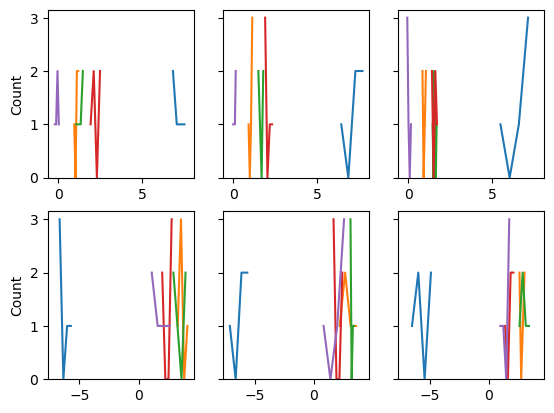

In [19]:
fig, ax = plt.subplots(2, 3, sharex='row', sharey='row')
# ax = ax.flatten()
for idx, model in enumerate(models):
    metric_path = os.path.join(models_path, model)
    metrics = os.listdir(metric_path)
    for metric in metrics:
        # Want all metrics in one plot
        posterior_path = os.path.join(metric_path, metric)
        posteriors = os.listdir(posterior_path)
        # We only want the 0.1% quantiles - but we use 5% just because there is more samples atm
        path = os.path.join(posterior_path, posteriors[2])
        p = np.load(path)
        # Want median values only
        alpha_median = p[:,:,1][:,0]
        beta_median = p[:,:,1][:,1]
        sns.histplot(ax=ax[0, idx], data=alpha_median, element="poly", fill=False)
        sns.histplot(ax=ax[1, idx], data=beta_median, element="poly", fill=False)